<a href="https://colab.research.google.com/github/pa0lai/deeplearning/blob/main/LSTM%2B%E9%A0%90%E6%B8%AC%E6%9C%AA%E4%BE%86%E8%82%A1%E5%83%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境建置 、檢查資料


In [ ]:
!pip install twstock

import twstock
import csv
import pandas as pd
import twstock
import os
import matplotlib.pyplot as plt
import time
from matplotlib.font_manager import FontProperties

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.0 MB/s eta 0:00:00


#函式

## 檢查股票是否可載

In [ ]:
stock = twstock.Stock('2317')# 鴻海
print(stock.price)

[100.5, 98.3, 99.0, 98.5, 98.2, 94.5, 96.5, 95.6, 97.0, 95.8, 96.4, 96.1, 97.0, 97.9, 97.2, 97.7, 100.0, 100.5, 101.0, 102.5, 101.0, 102.5, 102.0, 101.5, 101.5, 101.5, 102.5, 102.0, 101.5, 100.5, 101.0]


##最近股票價格

In [ ]:
stock = twstock.Stock('2317')

print("日期：",stock.date[-1])
print("開盤價：",stock.open[-1])
print("最高價：",stock.high[-1])
print("最低價：",stock.low[-1])
print("收盤價：",stock.price[-1])

日期： 2023-12-04 00:00:00
開盤價： 101.0
最高價： 101.5
最低價： 100.5
收盤價： 101.0


## 取得資料方式

In [ ]:
stock = twstock.Stock('2317')
print(stock.fetch(2023,11)) # 取得 2020 年 11 月的資料
stock.fetch_31()    # 取得最近 31 日的資料
# stock.fetch_from(2020,1) # 取得 2020 年 1 月至今的資料

[Data(date=datetime.datetime(2023, 11, 1, 0, 0), capacity=26792559, turnover=2570478042, open=96.4, high=96.5, low=95.6, close=95.6, change=-0.9, transaction=21619), Data(date=datetime.datetime(2023, 11, 2, 0, 0), capacity=25319099, turnover=2450735413, open=96.2, high=97.4, low=96.0, close=97.0, change=1.4, transaction=17294), Data(date=datetime.datetime(2023, 11, 3, 0, 0), capacity=44283856, turnover=4236360020, open=95.8, high=96.2, low=95.2, close=95.8, change=-1.2, transaction=40355), Data(date=datetime.datetime(2023, 11, 6, 0, 0), capacity=39193519, turnover=3794411528, open=96.2, high=97.7, low=96.2, close=96.4, change=0.6, transaction=23895), Data(date=datetime.datetime(2023, 11, 7, 0, 0), capacity=28714421, turnover=2753863793, open=96.4, high=96.8, low=95.5, close=96.1, change=-0.3, transaction=23562), Data(date=datetime.datetime(2023, 11, 8, 0, 0), capacity=20362795, turnover=1971844942, open=95.7, high=97.4, low=95.7, close=97.0, change=0.9, transaction=13149), Data(date=da

KeyboardInterrupt: ignored

## 查詢股票及時交易資訊

In [ ]:
stock = twstock.Stock('2317')
print('近31個收盤價：')
print(stock.price)   #近31個收盤價
print('近10個收盤價：')
print(stock.price[-10:])   #近10日之收盤價

real = twstock.realtime.get('2317')
if real['success']:
    print('股票名稱、即時股票資料：')
    print('股票名稱：',real['info']['name'])
    print('開盤價：',real['realtime']['open'])
    print('最高價：',real['realtime']['high'])
    print('最低價：',real['realtime']['low'])
    print('目前股價：',real['realtime']['latest_trade_price'])
else:
    print('錯誤：' + real['rtmessage'])

近31個收盤價：
[100.5, 98.3, 99.0, 98.5, 98.2, 94.5, 96.5, 95.6, 97.0, 95.8, 96.4, 96.1, 97.0, 97.9, 97.2, 97.7, 100.0, 100.5, 101.0, 102.5, 101.0, 102.5, 102.0, 101.5, 101.5, 101.5, 102.5, 102.0, 101.5, 100.5, 101.0]
近10個收盤價：
[102.5, 102.0, 101.5, 101.5, 101.5, 102.5, 102.0, 101.5, 100.5, 101.0]
股票名稱、即時股票資料：
股票名稱： 鴻海
開盤價： 101.0000
最高價： 102.0000
最低價： 100.5000
目前股價： 100.5000


##matplotlib中文字體處理

In [ ]:
# 先檢查 Colab 目前 Python 版本（至小數點下兩位），得知將來字形檔安裝路徑
!python --version

# 下載台北思源黑體，並命名taipei_sans_tc_beta.ttf
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 移至指定路徑（若 Python 版本並非 3.10，則需配合更改）
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf

# 自定義字體變數（若 Python 版本並非 3.10，則需配合更改）
myfont = FontProperties(fname=r'/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# 後續在相關函式中，使用 myfont 做為指定字形即可。
# 如：plt.xlabel("時間", fontproperties=myfont)
# 如：plt.legend(loc='best', prop=myfont)

Python 3.10.12
--2023-12-05 04:31:37--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.138, 142.251.2.101, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/25acolrh7suckqgudthpho5pkmqab70o/1701750675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b6b2e4a4-a9f3-483a-9a31-713eabb1b0ce [following]
--2023-12-05 04:31:38--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/25acolrh7suckqgudthpho5pkmqab70o/1701750675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b6b2e4a4-a9f3-483a-9a31-713eabb1b0ce
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting

# 視覺化

## 單月個股統計圖

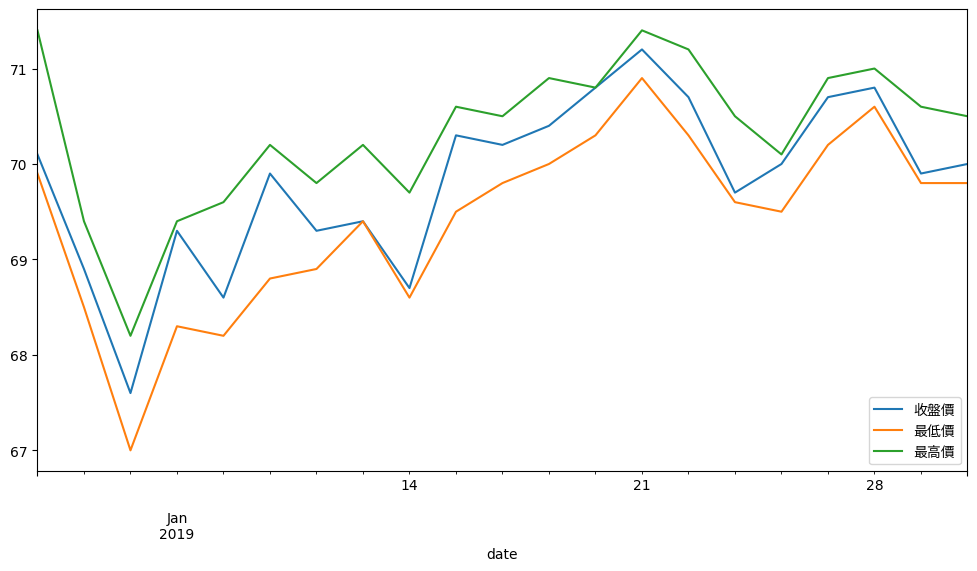

In [ ]:
import csv
import pandas as pd
import twstock
import os
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

filepath = 'twstockmonth01.csv'

if not os.path.isfile(filepath):
    stock = twstock.Stock('2317')
    stocklist=stock.fetch(2019,1)

    title=["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"]
    data=[]
    for stock in stocklist:
        strdate=stock.date.strftime("%Y-%m-%d")

        li=[strdate,stock.capacity,stock.turnover,stock.open,stock.high,\
            stock.low,stock.close,stock.change,stock.transaction]
        data.append(li)

    outputfile = open(filepath,'w',newline='',encoding='big5')
    outputwriter = csv.writer(outputfile)
    outputwriter.writerow(title)
    for dataline in data:
        outputwriter.writerow(dataline)
    outputfile.close()

pdstock = pd.read_csv(filepath, encoding='big5')
pdstock['date'] = pd.to_datetime(pdstock['日期'])
pdstock.plot(kind='line', figsize=(12, 6), x='date', y=['收盤價', '最低價', '最高價'])
plt.legend(loc='best', prop=myfont)

## 全年個股統計圖（建圖）

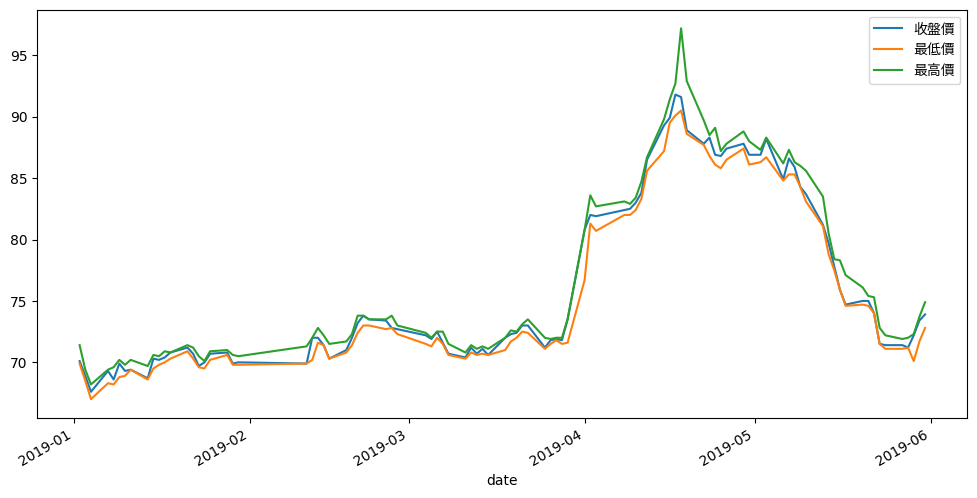

In [ ]:
def setInfo(s, monthBegin, monthEnd, year):
  filepath = 'twstockyear2019.csv'

  if not os.path.isfile(filepath):
      title=["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"]
      outputfile = open(filepath, 'a', newline='', encoding='big5')
      outputwriter = csv.writer(outputfile)
      for i in range(monthBegin,monthEnd):
          stock = twstock.Stock(s)
          stocklist=stock.fetch(year,i)

          data=[]
          for stock in stocklist:
              strdate=stock.date.strftime("%Y-%m-%d")

              li=[strdate,stock.capacity,stock.turnover,stock.open,stock.high,stock.low,\
                  stock.close,stock.change,stock.transaction]
              data.append(li)

          if i==1:
              outputwriter.writerow(title)
          for dataline in (data):
              outputwriter.writerow(dataline)
          time.sleep(1)
      outputfile.close()

setInfo("2317",1,3,2019)

pdstock = pd.read_csv(filepath, encoding='big5')
pdstock['date'] = pd.to_datetime(pdstock['日期'])
pdstock.plot(kind='line', figsize=(12, 6), x='date', y=['收盤價', '最低價', '最高價'])
plt.legend(loc='best', prop=myfont)


 ## 全年個股統計圖（調整時間維度）

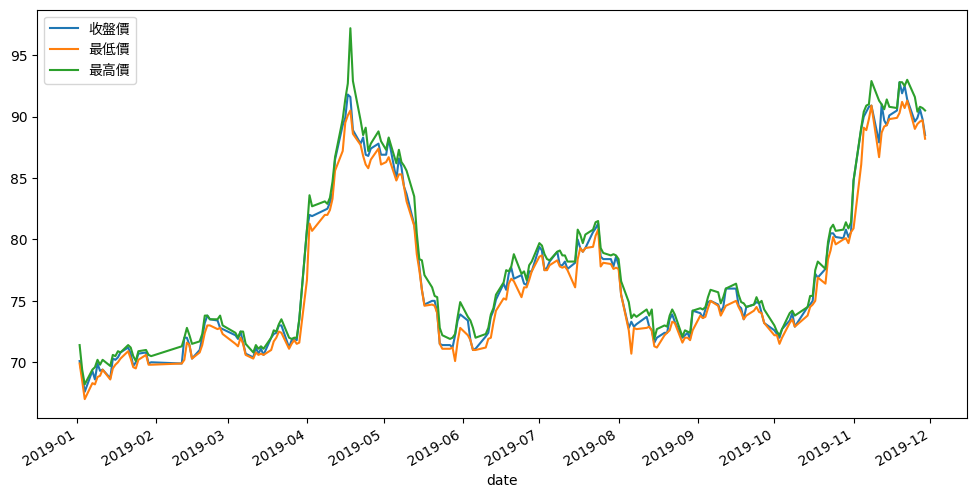

In [ ]:
def addInfo(s, monthBegin, monthEnd, year):
  filepath = 'twstockyear2019.csv'

  if os.path.isfile(filepath):
      title=["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"]
      outputfile = open(filepath, 'a', newline='', encoding='big5')
      outputwriter = csv.writer(outputfile)
      for i in range(monthBegin,monthEnd):
          stock = twstock.Stock(s)
          stocklist=stock.fetch(year,i)

          data=[]
          for stock in stocklist:
              strdate=stock.date.strftime("%Y-%m-%d")

              li=[strdate,stock.capacity,stock.turnover,stock.open,stock.high,stock.low,\
                  stock.close,stock.change,stock.transaction]
              data.append(li)

          if i==1:
              outputwriter.writerow(title)
          for dataline in (data):
              outputwriter.writerow(dataline)
          time.sleep(1)
      outputfile.close()

addInfo("2317",4,6,2019)
addInfo("2317",7,9,2019)
addInfo("2317",10,12,2019)

pdstock = pd.read_csv(filepath, encoding='big5')
pdstock['date'] = pd.to_datetime(pdstock['日期'])
pdstock.plot(kind='line', figsize=(12, 6), x='date', y=['收盤價', '最低價', '最高價'])
plt.legend(loc='best', prop=myfont)


## 建立plotly圖

In [ ]:
!pip install plotly
from plotly.graph_objs import Scatter,Layout
from plotly.offline import plot

filepath = 'twstockyear2019.csv'

if not os.path.isfile(filepath):
    title=["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"]
    outputfile = open(filepath, 'a', newline='', encoding='big5')
    outputwriter = csv.writer(outputfile)  #以csv格式寫入檔案
    for i in range(1,7):  #設定下載的月份
        stock = twstock.Stock('2317')  # 建立 Stock 物件
        stocklist=stock.fetch(2019,i)

        data=[]
        for stock in stocklist:
            strdate=stock.date.strftime("%Y-%m-%d") #  將datetime物件轉換為字串
            # 讀取 日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
            li=[strdate,stock.capacity,stock.turnover,stock.open,stock.high,stock.low,\
                stock.close,stock.change,stock.transaction]
            data.append(li)

        if i==1:  #若是1月就寫入欄位名稱
            outputwriter.writerow(title) #寫入標題
        for dataline in (data):  #逐月寫入資料
            outputwriter.writerow(dataline)
        time.sleep(1)
    outputfile.close()

pdstock = pd.read_csv(filepath, encoding='big5')
data = [
    Scatter(x=pdstock['日期'], y=pdstock['收盤價'], name='收盤價'),
    Scatter(x=pdstock['日期'], y=pdstock['最低價'], name='最低價'),
    Scatter(x=pdstock['日期'], y=pdstock['最高價'], name='最高價')
]
plot({"data": data, "layout": Layout(title='2019年個股統計圖')},auto_open=True)

'temp-plot.html'

# 模型驗證

Epoch 1/300
4/4 [==============================] - 2s 206ms/step - loss: 0.0428 - accuracy: 0.0000e+00 - val_loss: 0.1239 - val_accuracy: 0.0238
Epoch 2/300
4/4 [==============================] - 0s 19ms/step - loss: 0.0236 - accuracy: 0.0000e+00 - val_loss: 0.0241 - val_accuracy: 0.0238
Epoch 3/300
4/4 [==============================] - 0s 18ms/step - loss: 0.0128 - accuracy: 0.0000e+00 - val_loss: 0.0622 - val_accuracy: 0.0238
Epoch 4/300
4/4 [==============================] - 0s 23ms/step - loss: 0.0141 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0238
Epoch 5/300
4/4 [==============================] - 0s 25ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0163 - val_accuracy: 0.0238
Epoch 6/300
4/4 [==============================] - 0s 23ms/step - loss: 0.0099 - accuracy: 0.0000e+00 - val_loss: 0.0161 - val_accuracy: 0.0238
Epoch 7/300
4/4 [==============================] - 0s 18ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 0.0162 - val_accuracy

4/4 [==============================] - 0s 4ms/step


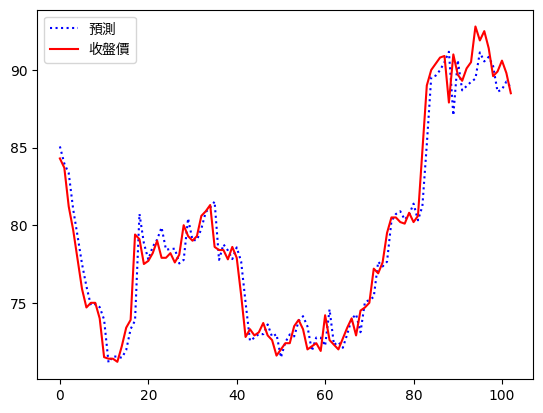

'temp-plot.html'

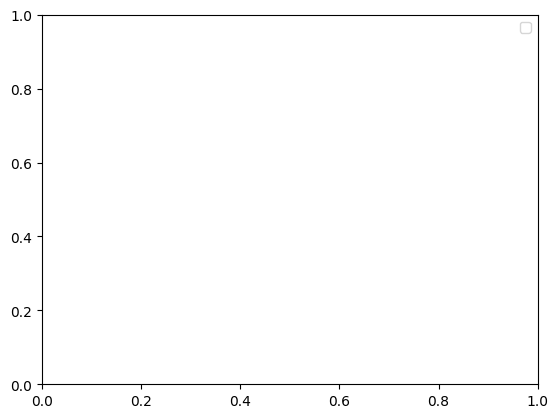

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from plotly.graph_objs import Scatter, Layout
from plotly.offline import plot

plt.rcParams["axes.unicode_minus"] = False

def load_data(df, dfp, sequence_length=1, split=0.8):

    data_all = np.array(df).astype(float)
    # print(data_all.shape) # (242,3)
    data_all = scaler.fit_transform(data_all)

    datap_all = np.array(dfp).astype(float)
    # print(datap_all.shape) # (242,1)
    datap_all = scalert.fit_transform(datap_all) # 特徵縮放

    data = []  # ['收盤價','最高價','最低價']
    datap = [] # 收盤價
    # data、datap 資料共有 (242-10)=232 筆
    for i in range(len(data_all) - sequence_length):
        # 第 1~10天 的 ['收盤價','最高價','最低價'] 當作特徵
        data.append(data_all[i: i + sequence_length])
        # 第 11 天的收盤價當作標籤
        datap.append(datap_all[i + sequence_length])

    x = np.array(data).astype('float64')  # 轉為浮點型別矩陣
    y = np.array(datap).astype('float64') # 轉為浮點型別矩陣

    split_boundary = int(x.shape[0] * split)
    train_x = x[: split_boundary] # 前 80% train
    test_x = x[split_boundary:]   # 後 20% test

    train_y = y[: split_boundary] # 前 80% 為 train label
    test_y = y[split_boundary:]   # 最後 20% 為 test label

    return train_x, train_y, test_x, test_y

def build_model():
    model = Sequential()
    # 隱藏層：256 個神經元，input_shape：(10,3)
    # TIME_STEPS=10,INPUT_SIZE=3
    model.add(LSTM(input_shape=(10,3),units=256,unroll=False))
    model.add(Dense(units=1)) # 輸出層：1 個神經元
    #compile:loss, optimizer, metrics
    model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])


    return model

def train_model(train_x, train_y, test_x, test_y):

    try:
        model.fit(train_x, train_y, batch_size=100, epochs=300, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, )) #轉1維矩陣
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    return predict #傳回 預測值

# 主程式
pd.options.mode.chained_assignment = None  #取消顯示pandas資料重設警告
filename = 'twstockyear2019.csv'
df = pd.read_csv(filename, encoding='big5')#以pandas讀取檔案
ddtrain=df[['收盤價','最高價','最低價']]
ddprice=df[['收盤價']]

scaler = MinMaxScaler()  # 建立處理特徵的 MinMaxScaler 物件
scalert = MinMaxScaler() # 建立處理標籤的 MinMaxScaler 物件
train_x, train_y, test_x, test_y=load_data(ddtrain, ddprice, sequence_length=10, split=0.8)
# train_x 共 232*0.8=185 筆, test_x 共 232*0.2=47 筆
# print(train_x.shape,train_y.shape) # (185,10,3) (185,3)
# print(test_x.shape,test_y.shape)   # (47,10,3)  (47,1)

model = build_model() # 建立 RNN 模型
predict_y = train_model(train_x, train_y, test_x, test_y) # 訓練和預測
predict_y = scalert.inverse_transform([[i] for i in predict_y])   # 還原
test_y = scalert.inverse_transform(test_y)  # 還原

plt.plot(predict_y, 'b:') #預測
plt.plot(test_y, 'r-')    #收盤價
plt.legend(['預測', '收盤價'], prop=myfont)
plt.show()

# 建立 DataFrame，加入 predict_y、test_y，準備以 plotly 繪圖
dd2=pd.DataFrame({"predict":list(predict_y),"label":list(test_y)})
#轉換為 numpy 陣列，並轉為 float
dd2["predict"] = np.array(dd2["predict"]).astype('float64')
dd2["label"] = np.array(dd2["label"]).astype('float64')

data = [
    Scatter(y=dd2["predict"],name='預測',line=dict(color="blue",dash="dot")),
    Scatter(y=dd2["label"],name='收盤價',line=dict(color="red"))
]

plt.legend(loc='best', prop=myfont)
plot({"data": data, "layout": Layout(title='2019年個股預測圖')},auto_open=True)

# 預測未來股價 (獨立)

##環境建置

In [ ]:
!git clone https://github.com/koreal6803/Stocker.git
!pip install libpython m2w64-toolchain-c msys2
!pip install -r Stocker/requirements.txt

fatal: destination path 'Stocker' already exists and is not an empty directory.
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement m2w64-toolchain-c (from versions: none)
ERROR: No matching distribution found for m2w64-toolchain-c
  Using cached Quandl-3.7.0-py2.py3-none-any.whl (26 kB)
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached pytrends-4.9.2-py3-none-any.whl (15 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Us

## 讀入資料

In [ ]:
import pandas as pd

import csv
import twstock
import os


filepath = '4712.csv'

if not os.path.isfile(filepath):
    stock = twstock.Stock('4712')
    stocklist=stock.fetch_from(2023,1)

    title=["date","收盤價"]
    data=[]
    for stock in stocklist:
        strdate=stock.date.strftime("%Y-%m-%d")

        li=[strdate,stock.close]
        data.append(li)

    outputfile = open(filepath,'w',newline='',encoding='UTF8')
    outputwriter = csv.writer(outputfile)
    outputwriter.writerow(title)
    for dataline in data:
        outputwriter.writerow(dataline)
    outputfile.close()

### 讀入series
df = pd.read_csv(filepath, index_col='date', parse_dates=['date'])
price = df.squeeze()
price.head()

date
2023-01-03    4.75
2023-01-04    4.84
2023-01-05    5.00
2023-01-06    5.04
2023-01-09    5.15
Name: 收盤價, dtype: float64

In [ ]:
print(df)
print(df.squeeze)


             收盤價
date            
2023-01-03  4.75
2023-01-04  4.84
2023-01-05  5.00
2023-01-06  5.04
2023-01-09  5.15
...          ...
2023-11-29  2.83
2023-11-30  2.78
2023-12-01  2.73
2023-12-04  2.75
2023-12-05  2.68

[221 rows x 1 columns]
<bound method NDFrame.squeeze of              收盤價
date            
2023-01-03  4.75
2023-01-04  4.84
2023-01-05  5.00
2023-01-06  5.04
2023-01-09  5.15
...          ...
2023-11-29  2.83
2023-11-30  2.78
2023-12-01  2.73
2023-12-04  2.75
2023-12-05  2.68

[221 rows x 1 columns]>


## 建立物件

In [ ]:
from Stocker.stocker import Stocker
company = Stocker(price)

the stock Stocker Initialized. Data covers 2023-01-03 00:00:00 to 2023-12-05 00:00:00.


## 預測三個月走向

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3yyxd5_6/kbbke_y9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3yyxd5_6/44pxsdc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3680', 'data', 'file=/tmp/tmp3yyxd5_6/kbbke_y9.json', 'init=/tmp/tmp3yyxd5_6/44pxsdc4.json', 'output', 'file=/tmp/tmp3yyxd5_6/prophet_modelt3qmz395/prophet_model-20231205165840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:58:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predicted Price on 2024-03-04 00:00:00 = $7.42


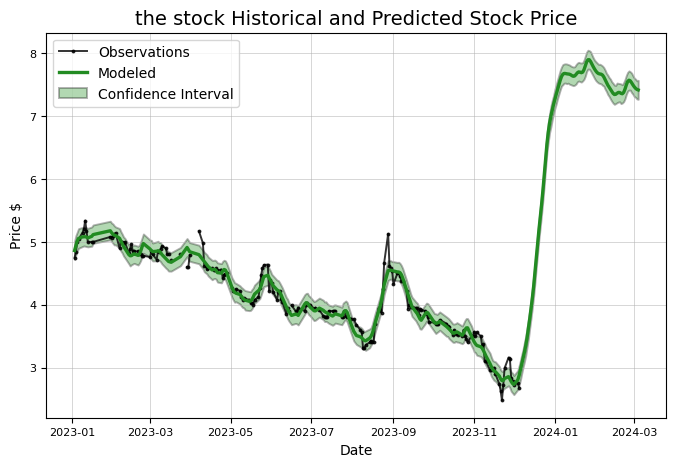

In [ ]:
model, model_data = company.create_prophet_model(days=90)

## 檢查預測是否準確

In [ ]:
company.evaluate_prediction()

Start Date is before date range
Enter a new start date: 2023-12-06


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3yyxd5_6/_cfn238j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3yyxd5_6/axomzfe6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54764', 'data', 'file=/tmp/tmp3yyxd5_6/_cfn238j.json', 'init=/tmp/tmp3yyxd5_6/axomzfe6.json', 'output', 'file=/tmp/tmp3yyxd5_6/prophet_modelk_yhjw0w/prophet_model-20231205165657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:56:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:56:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediction Range: 2023-12-06 00:00:00 to 2023-12-05 00:00:00.

Predicted price on 2024-12-04 00:00:00 = $11.51.


ValueError: ignored

## 預測短中長期股價

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3yyxd5_6/agwmm9oc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3yyxd5_6/45pw5ayi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31012', 'data', 'file=/tmp/tmp3yyxd5_6/agwmm9oc.json', 'init=/tmp/tmp3yyxd5_6/45pw5ayi.json', 'output', 'file=/tmp/tmp3yyxd5_6/prophet_model17x4czo5/prophet_model-20231205165909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:59:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:59:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:59:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3yyxd5_6/7d9lj_ew.json
DE

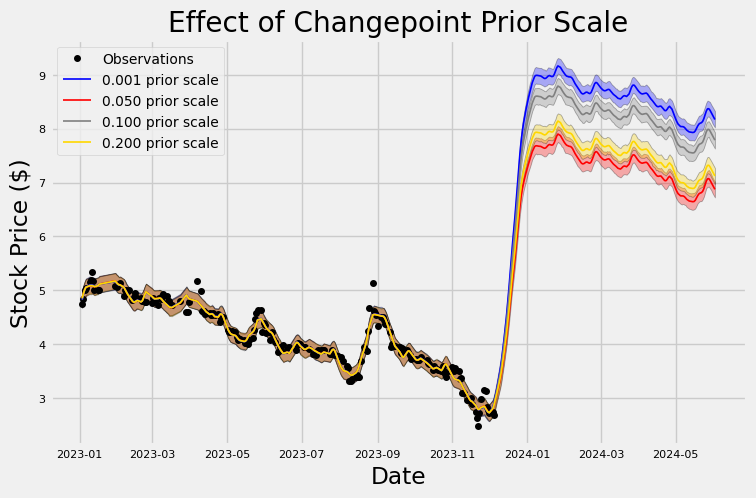

In [ ]:
company.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

## 預測股價

In [ ]:
company.predict_future(days=100)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3yyxd5_6/q4pp9ido.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3yyxd5_6/c596j7cm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26380', 'data', 'file=/tmp/tmp3yyxd5_6/q4pp9ido.json', 'init=/tmp/tmp3yyxd5_6/c596j7cm.json', 'output', 'file=/tmp/tmp3yyxd5_6/prophet_modelmnxlepun/prophet_model-20231205165918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:59:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:59:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Predicted Increase: 

         Date  estimate    change     upper     lower
1  2023-12-06  2.976529  0.092853  3.129871  2.823562
2  2023-12-07  3.075711  0.099182  3.214489  2.917916
3  2023-12-08  3.173754  0.098043  3.324049  3.023735
5  2023-12-10  3.385372  0.211618  3.531121  3.235404
6  2023-12-11  3.517666  0.132294  3.666153  3.366600
7  2023-12-12  3.669633  0.151967  3.829290  3.513629
8  2023-12-13  3.833618  0.163984  3.989114  3.676655
9  2023-12-14  4.004444  0.170826  4.155012  3.862158
10 2023-12-15  4.186219  0.181775  4.344682  4.048380
12 2023-12-17  4.617173  0.430954  4.762580  4.460465
13 2023-12-18  4.861940  0.244767  4.995888  4.709796
14 2023-12-19  5.104403  0.242463  5.254854  4.947834
15 2023-12-20  5.330005  0.225602  5.478653  5.177029
16 2023-12-21  5.540754  0.210749  5.690400  5.399595
17 2023-12-22  5.754163  0.213409  5.908589  5.602788
19 2023-12-24  6.246081  0.491918  6.394820  6.093183
20 2023-12-25  6.508636  0.262554  6.662405  6.369530
21 20

ValueError: ignored